In [ ]:
!pip install tensorflow keras


In [ ]:
# ===== 1. Upload & unzip dataset =====
from google.colab import files
import zipfile, os

uploaded = files.upload()  # chọn file .zip (vd: data_mono.zip)
zip_path = next(iter(uploaded.keys()))

extract_path = "/content/data_mono"
!rm -rf {extract_path}
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# ===== 2. Duyệt dữ liệu ảnh =====
import cv2
import numpy as np

x_data, y_data = [], []
# Correctly list the class directories within the nested folder
class_base_path = os.path.join(extract_path, "data_mono")
class_names = sorted([name for name in os.listdir(class_base_path) if os.path.isdir(os.path.join(class_base_path, name))])

print("Classes:", class_names)

for label, class_name in enumerate(class_names):
    class_dir = os.path.join(class_base_path, class_name)
    # Recursively walk through subdirectories to find image files
    for root, dirs, files_in_dir in os.walk(class_dir):
        for fname in files_in_dir:
            fpath = os.path.join(root, fname)
            # Check if the file is an image (basic check based on extension)
            if fname.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                img = cv2.imread(fpath, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    print(f"Warning: Could not read image file: {fpath}")
                    continue
                img_resized = cv2.resize(img, (28, 28))
                x_data.append(img_resized)
                y_data.append(label)

x_data = np.array(x_data, dtype="float32") / 255.0
y_data = np.array(y_data, dtype="int")

print("Dataset shape:", x_data.shape, y_data.shape)

# ===== 3. Reshape & one-hot =====
if x_data.shape[0] > 0: # Only proceed if data is loaded
  x_data = x_data.reshape(x_data.shape[0], 28*28)  # flatten
  from keras.utils import to_categorical
  y_data = to_categorical(y_data, num_classes=len(class_names))

  # ===== 4. Chia train/test =====
  from sklearn.model_selection import train_test_split
  x_train, x_test, y_train, y_test = train_test_split(
      x_data, y_data, test_size=0.2, random_state=42, stratify=y_data
  )

  print("Train:", x_train.shape, y_train.shape)
  print("Test:", x_test.shape, y_test.shape)

  # ===== 5. Xây dựng ANN =====
  from keras.models import Sequential
  from keras.layers import Dense
  from keras.layers import Dropout # Import Dropout layer

  model = Sequential()
  model.add(Dense(512, activation='relu', input_shape=(784,)))
  model.add(Dropout(0.3)) # Added Dropout layer
  model.add(Dense(256, activation='relu')) # Added Dense layer
  model.add(Dropout(0.3)) # Added Dropout layer
  model.add(Dense(len(class_names), activation='softmax')) # Output layer with correct number of classes

  model.compile(optimizer="rmsprop",
                loss="categorical_crossentropy",
                metrics=["accuracy"])

  model.summary()

  # ===== 6. Huấn luyện =====
  history = model.fit(x_train, y_train,
                      epochs=200,
                      batch_size=128,
                      validation_data=(x_test, y_test))

  # ===== 7. Lưu model =====
  model.save("final_model.h5")
  print("✅ Model saved!")

In [ ]:
from google.colab import files
uploaded = files.upload()
fname = next(iter(uploaded.keys()))

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img, (28,28))
img_norm = img_resized.astype("float32")/255.0
img_ready = img_norm.reshape(1, 28*28)

preds = model.predict(img_ready)
digit = class_names[np.argmax(preds)]
print("Dự đoán:", digit)

plt.imshow(img_norm, cmap="gray")
plt.title(f"DỰ ĐOÁN ĐÂY LÀ : {digit}")
plt.axis("off")
plt.show()

Saving NHUẬN.jpg to NHUẬN.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128248 (\N{CAMERA WITH FLASH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


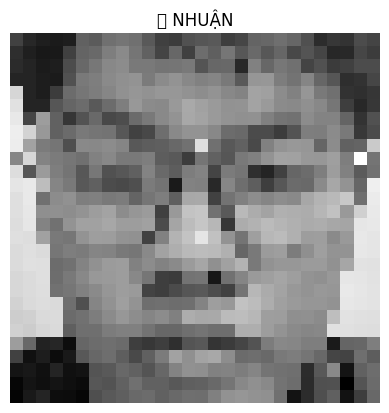

Saving ĐẠT.jpg to ĐẠT (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


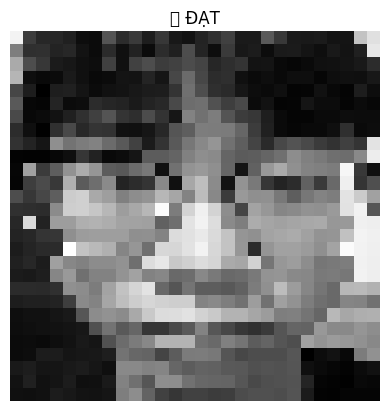

Saving LINH.jpg to LINH (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


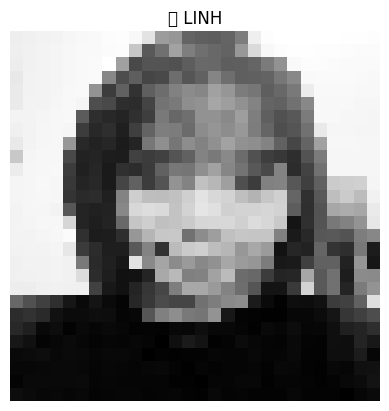

In [ ]:
from google.colab import files, output
import cv2, numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# ===== Bảng giới thiệu =====
palmistry_info = {
    "NHUẬN": "Hoàng Nhuận với MSSV 31241024710, là một người đam mê công nghệ và thể thao. Nam thường dành thời gian để học tập, tìm hiểu về các mạch điện và hệ thống thông minh và cũng tham gia các trận bóng chuyền sôi động. Về ngoại hình, mình cao khoảng 170 cm và nặng 80 kg. Là một người sống hòa đồng, sôi nổi,nhiệt tình, luôn sẵn lòng lắng nghe và hỗ trợ bạn bè trong học tập và các dự án sáng tạo.",
    "LINH": "Thùy Linh, hiện là sinh viên với MSSV 31241023167. Linh có niềm đam mê với đọc sách và chơi cầu lông, và thường dành thời gian rảnh để khám phá thêm những kỹ năng mới hoặc thử sức với những trò chơi sáng tạo. Về ngoại hình, mình cao khoảng 160 cm và nặng 48 kg. Mình là người hòa đồng, thích kết nối với mọi người và luôn sẵn sàng tham gia các hoạt động nhóm hoặc dự án mới để trải nghiệm và phát triển bản thân.",
    "ĐẠT": "Tuấn Đạt – MSSV 31241021943 – là một người trẻ đầy nhiệt huyết, luôn nuôi dưỡng niềm đam mê với công nghệ và thể thao. Ngoài giờ học, Đạt thường dành thời gian để khám phá tri thức mới, tìm hiểu về cuộc sống và mở rộng góc nhìn. Với ngoại hình cân đối (cao khoảng 1m70, nặng 65kg), Đạt mang phong thái năng động, khỏe khoắn. Trong giao tiếp, Đạt được biết đến là người hòa đồng, sôi nổi và nhiệt tình. Không chỉ hăng hái tham gia hoạt động tập thể, Đạt còn luôn sẵn sàng lắng nghe, chia sẻ và hỗ trợ bạn bè trong học tập cũng như các dự án sáng tạo.",
}

# ===== Hàm dự đoán khuôn mặt =====
def predict_face():
    uploaded = files.upload()  # mở file picker Colab
    fname = next(iter(uploaded.keys()))

    img = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (28,28))
    img_norm = img_resized.astype("float32")/255.0
    img_ready = img_norm.reshape(1, 28*28)

    preds = model.predict(img_ready)[0]
    top_index = preds.argmax()
    top_label = class_names[top_index]
    top_prob = preds[top_index]

    # Lấy mô tả từ bảng
    description = palmistry_info.get(top_label, "Thông tin về khuôn mặt này chưa có trong cơ sở dữ liệu.")

    html_result = f"""
        <div>📸 Kết quả: <b>{top_label}</b> ({top_prob*100:.2f}%)</div>
        <p style='margin-top:15px; font-size:18px; color:#b39ddb; font-family:Poppins;'>{description}</p>
    """

    display(HTML(f"""
        <script>
            document.getElementById('result').innerHTML = `{html_result}`;
            document.getElementById('resetBtn').style.display = 'inline-block';
        </script>
    """))

    plt.imshow(img_norm, cmap="gray")
    plt.title(f"📸 {top_label}")
    plt.axis("off")
    plt.show()

# Đăng ký callback
output.register_callback('predict_face', predict_face)

# ===== HTML Giao diện công nghệ =====
display(HTML("""
<!DOCTYPE html>
<html lang="vi">
<head>
<meta charset="UTF-8">
<title>Nhận diện khuôn mặt</title>
<link href="https://fonts.googleapis.com/css2?family=Orbitron:wght@600;800&family=Poppins:wght@400;600&display=swap" rel="stylesheet">
<style>
    body {
        font-family: 'Orbitron', sans-serif;
        background: linear-gradient(135deg, #0f2027, #203a43, #2c5364);
        text-align: center;
        padding: 50px;
        color: #fff;
    }
    h1 {
        font-size: 50px;
        margin-bottom: 30px;
        color: #00e5ff;
        text-shadow: 0 0 15px #00e5ff, 0 0 30px #00bcd4;
        font-weight: 800;
        letter-spacing: 3px;
    }
    .card {
        background: rgba(0, 0, 0, 0.8);
        padding: 30px;
        border-radius: 20px;
        box-shadow: 0px 8px 25px rgba(0,0,0,0.7);
        max-width: 700px;
        margin: auto;
        border: 2px solid #00e5ff;
    }
    button {
        margin-top: 20px;
        padding: 15px 45px;
        font-size: 18px;
        border: none;
        border-radius: 40px;
        cursor: pointer;
        font-weight: bold;
        transition: all 0.3s ease;
        font-family: 'Orbitron', sans-serif;
    }
    #predictBtn {
        background: linear-gradient(45deg, #00e5ff, #18ffff);
        box-shadow: 0px 0px 20px rgba(0, 229, 255, 0.9);
        color: #000;
    }
    #predictBtn:hover {
        transform: scale(1.08);
        box-shadow: 0px 0px 30px rgba(0, 229, 255, 1);
    }
    #resetBtn {
        background: linear-gradient(45deg, #00c853, #64dd17);
        display: none;
        color: #000;
        box-shadow: 0px 0px 20px rgba(0, 200, 83, 0.9);
    }
    #result {
        margin-top: 25px;
        font-size: 24px;
        font-weight: bold;
        color: #00e5ff;
        text-shadow: 0 0 12px #00e5ff, 0 0 25px #00bcd4;
        font-family: 'Orbitron', sans-serif;
    }
</style>
</head>
<body>
    <h1>AI FACE RECOGNITION</h1>
    <div class="card">
        <button id="predictBtn" onclick="google.colab.kernel.invokeFunction('predict_face', [], {});">
            📸 Upload & Detect
        </button>
        <button id="resetBtn" onclick="location.reload();">
            🔄 Try Another
        </button>
        <div id="result"></div>
    </div>
</body>
</html>
"""))